# Discretization/ Binning

Discretization or Binning in the context of machine learning and feature engineering is a
process that involves converting continuous features or variables into discrete or categorical
ones.

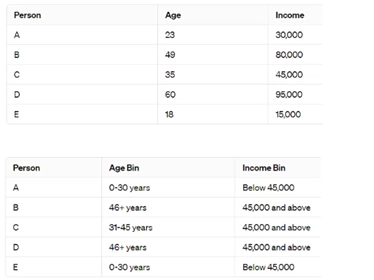

## Why learn Discretization?

### 1. Reduces Overfitting
By converting continuous variables into discrete bins, discretization effectively simplifies
the feature space. This simplification means the model has fewer nuances to learn from
the training data. While this might lead to a loss in detail or granularity, it also means
there's less chance for the model to learn noise or overly complex patterns that don't
generalize well to unseen data.


Discretization acts as a form of regularization, imposing a constraint on the model's
complexity. By reducing the number of unique values a feature can take, it limits the
model's ability to fit the training data too closely.

### 2. Handling non linear relationships
Linear models inherently assume a linear relationship between features and the target
variable. Discretization allows these models to approximate non-linear relationships by
fitting separate slopes to each bin, which can collectively approximate a non-linear trend.

### 3. Handling outliers
When you discretize the data, you categorize these continuous values into bins based on
their range. An outlier's impact is diluted because it's grouped with other values in the
same bin, reducing its ability to disproportionately influence the analysis. Essentially,
within each bin, the data points are treated equivalently, regardless of their specific
values.

### 4. Better interpretability
By grouping continuous data into bins, each bin can be treated as a distinct category with
its own effect on the model's predictions. This categorical interpretation allows for
straightforward explanations, such as "being in age group 30-40 increases the likelihood
of buying a new car compared to age group 20-30," which is more intuitive than
interpreting the effect of a one-year increase in age.

### 5. Model Compatibility

Discretization works particularly well with certain algorithms because it transforms
continuous variables into discrete ones, which can align better with the way these
algorithms process and interpret data. The effectiveness of discretization largely depends
on the nature of the algorithm, the specific data being analysed, and the problem being
solved.


Here's why discretization is favourable for some algorithms:


#### 1. Decision Trees and Ensemble Methods:


Algorithms like decision trees (and by extension, ensemble methods like Random
Forests and Gradient Boosting Machines) inherently split data into branches based
on conditions. Discretization can make these splits more meaningful, especially if the
continuous data does not have a clear linear relationship with the target variable.
Pre-discretized features can lead to simpler trees that are easier to interpret and
possibly more generalizable.

Pre-discretized features can lead to simpler trees that are easier to interpret and
possibly more generalizable.


#### 2. Naive Bayes:

Naive Bayes classifiers, particularly in their basic forms, assume that features are
independent and often deal better with categorical data. Discretization can help
when applying Naive Bayes to continuous data by fitting its assumption of category-
based probabilities, potentially improving model performance and interpretability.

### 1. Reducing Overfitting

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Original Feature - Train MSE: 280.367, Test MSE: 446.553
Discretized Feature - Train MSE: 339.937, Test MSE: 475.515


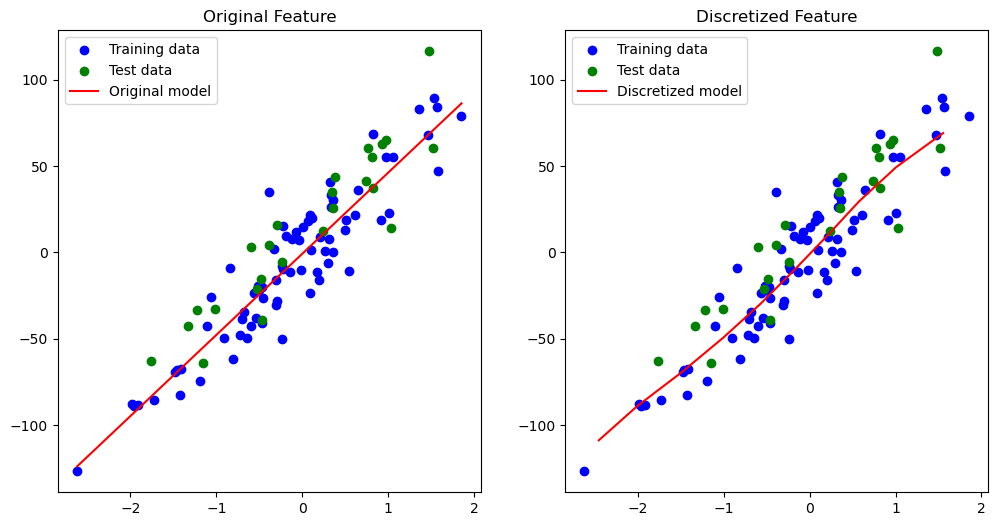

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear regression with the original feature
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_train_pred_orig = model_original.predict(X_train)
y_test_pred_orig = model_original.predict(X_test)

# Discretize the feature
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
X_train_disc = disc.fit_transform(X_train)
X_test_disc = disc.transform(X_test)

# Linear regression with the discretized feature
model_disc = LinearRegression()
model_disc.fit(X_train_disc, y_train)
y_train_pred_disc = model_disc.predict(X_train_disc)
y_test_pred_disc = model_disc.predict(X_test_disc)

# Calculate and print MSE for both models
mse_train_orig = mean_squared_error(y_train, y_train_pred_orig)
mse_test_orig = mean_squared_error(y_test, y_test_pred_orig)
mse_train_disc = mean_squared_error(y_train, y_train_pred_disc)
mse_test_disc = mean_squared_error(y_test, y_test_pred_disc)

print(f'Original Feature - Train MSE: {mse_train_orig:.3f}, Test MSE: {mse_test_orig:.3f}')
print(f'Discretized Feature - Train MSE: {mse_train_disc:.3f}, Test MSE: {mse_test_disc:.3f}')

# Plotting to visualize overfitting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(np.sort(X_train, axis=0), model_original.predict(np.sort(X_train, axis=0)), color='red', label='Original model')
plt.title('Original Feature')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
# For discretized model, predictions are plotted against the mid-point of each bin
bin_edges = disc.bin_edges_[0]
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_mids, model_disc.predict(disc.transform(bin_mids.reshape(-1, 1))), color='red', label='Discretized model')
plt.title('Discretized Feature')
plt.legend()

plt.show()


In [2]:
X_train_disc

array([[6.],
       [6.],
       [2.],
       [8.],
       [2.],
       [9.],
       [4.],
       [5.],
       [4.],
       [4.],
       [7.],
       [2.],
       [8.],
       [6.],
       [1.],
       [6.],
       [3.],
       [7.],
       [9.],
       [5.],
       [0.],
       [6.],
       [9.],
       [3.],
       [5.],
       [9.],
       [6.],
       [7.],
       [8.],
       [7.],
       [6.],
       [4.],
       [2.],
       [5.],
       [5.],
       [6.],
       [5.],
       [4.],
       [4.],
       [5.],
       [1.],
       [5.],
       [4.],
       [5.],
       [4.],
       [4.],
       [4.],
       [5.],
       [6.],
       [5.],
       [5.],
       [9.],
       [6.],
       [4.],
       [1.],
       [4.],
       [8.],
       [6.],
       [3.],
       [6.],
       [5.],
       [6.],
       [3.],
       [8.],
       [5.],
       [9.],
       [3.],
       [4.],
       [6.],
       [7.],
       [6.],
       [2.],
       [3.],
       [6.],
       [5.]])

### 2. Handling Non-Linear Relationships

#### Example 1 - Regression

Shape of X: (100, 1)
Shape of y: (100, 1)


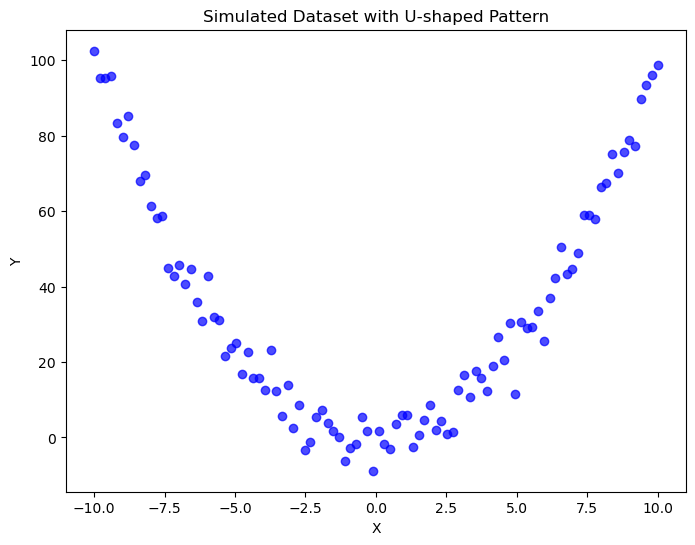

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error

# Ensure consistent environment
np.random.seed(42)

# Generate the dataset
X = np.linspace(-10, 10, 100).reshape(-1, 1)  # X is a 100x1 vector
y = X**2 + np.random.normal(0, 5, size=X.shape[0]).reshape(-1,1)  # y is directly based on X, ensuring matching length

# Verify the shapes
print(f"Shape of X: {X.shape}")  # Should print (100, 1)
print(f"Shape of y: {y.shape}")  # Should print (100,)

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('Simulated Dataset with U-shaped Pattern')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [4]:
# Fit non-discretized linear regression
model_nd = LinearRegression().fit(X, y)
y_pred_nd = model_nd.predict(X)

In [5]:
# Fit discretized linear regression
discretizer = KBinsDiscretizer(n_bins=4, encode='onehot', strategy='quantile')
X_discrete = discretizer.fit_transform(X)

model_d = LinearRegression().fit(X_discrete, y)

X_discrete.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [6]:
# Generate predictions for the original X values using the discretized model
y_pred_d = model_d.predict(X_discrete)

# Calculate MSE for both models using the correct set of predictions
mse_nd = mean_squared_error(y, y_pred_nd)  # No change needed here
mse_d = mean_squared_error(y, y_pred_d)  # Use corrected predictions

(mse_nd, mse_d)

(962.2105319929109, 314.45820416157204)

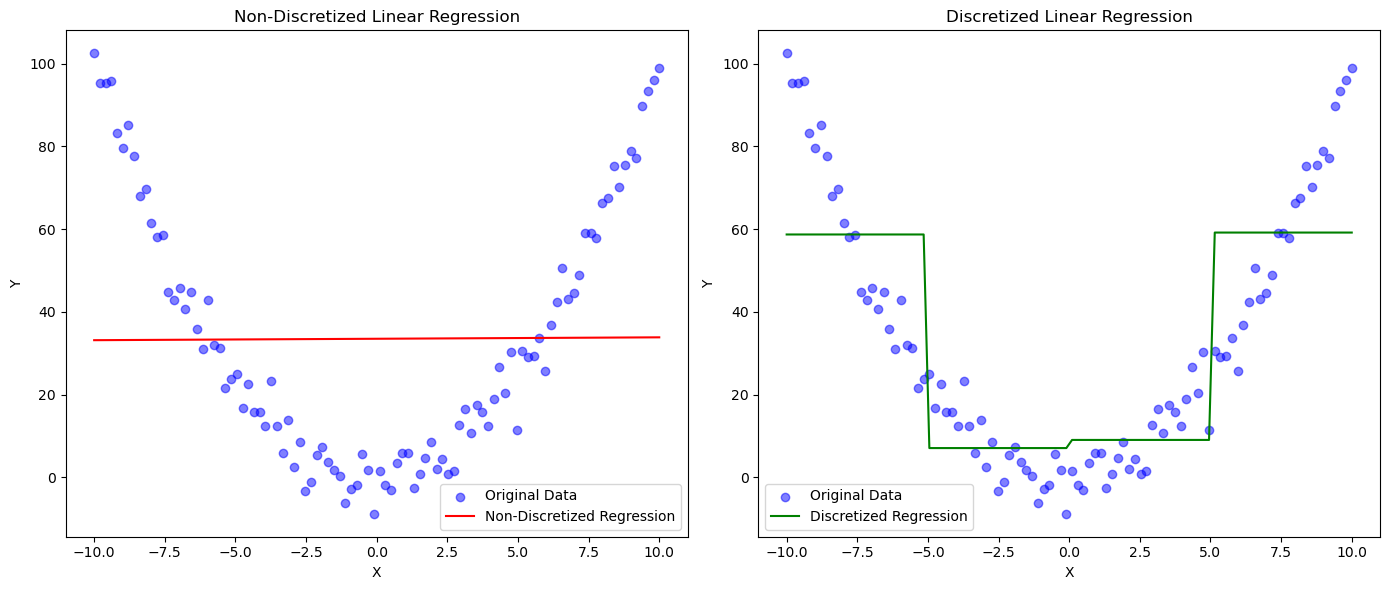

In [7]:
# Plot the results
plt.figure(figsize=(14, 6))

# Non-discretized regression
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_nd, color='red', label='Non-Discretized Regression')
plt.title('Non-Discretized Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Discretized regression
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred_d, color='green', label='Discretized Regression')
plt.title('Discretized Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

#### Example 2 - Classification Problem

In [8]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

# Generate a 2D toy dataset with a non-linear decision boundary
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: Logistic Regression on original features
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
accuracy_original = accuracy_score(y_test, preds)

# Discretization of the features
discretizer = KBinsDiscretizer(n_bins=10, encode='onehot', strategy='quantile')
X_train_binned = discretizer.fit_transform(X_train)
X_test_binned = discretizer.transform(X_test)

# Model 2: Logistic Regression on discretized features
lr_binned = LogisticRegression()
lr_binned.fit(X_train_binned, y_train)
preds_binned = lr_binned.predict(X_test_binned)
accuracy_binned = accuracy_score(y_test, preds_binned)

accuracy_original, accuracy_binned


(0.8766666666666667, 0.9566666666666667)

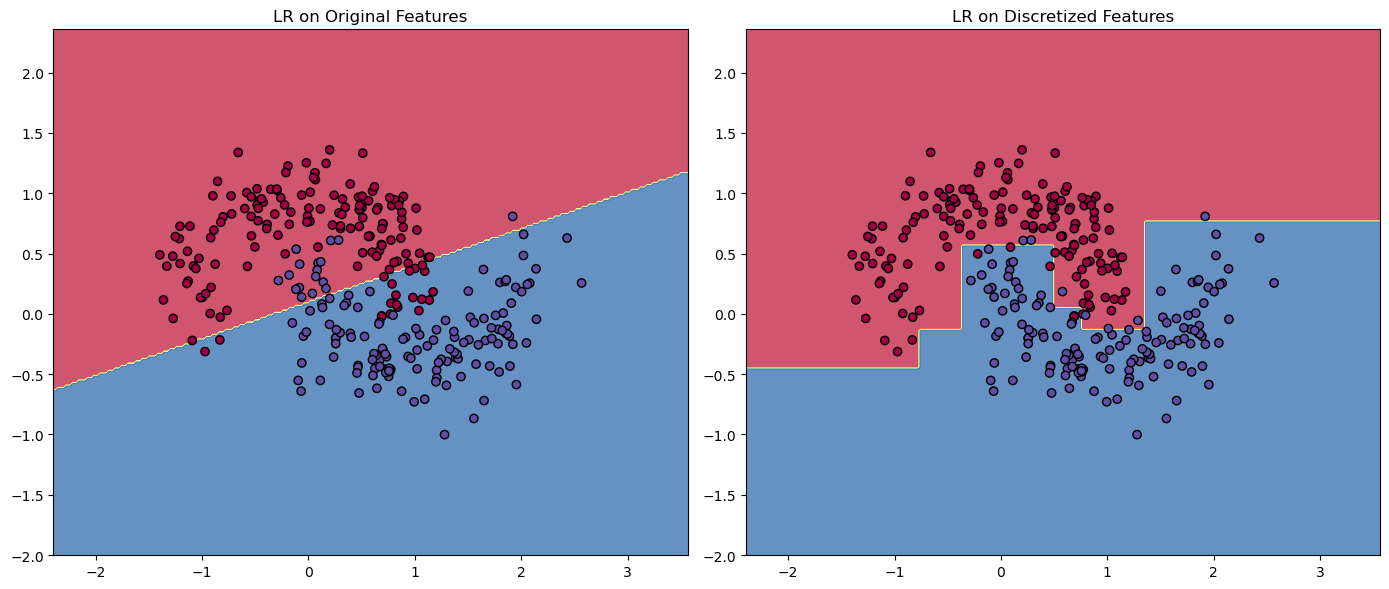

In [9]:
import matplotlib.colors as mcolors

def plot_decision_boundary(model, X, y, ax, title="Decision Boundary", is_discretized=False, discretizer=None):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Preprocess mesh grid if model is trained on discretized features
    if is_discretized and discretizer:
        Z = model.predict(discretizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # Plot also the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
    ax.set_title(title)
    ax.grid(False)

# Create figure for plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot decision boundary for the original logistic regression model
plot_decision_boundary(lr, X_test, y_test, axs[0], "LR on Original Features")

# Plot decision boundary for the logistic regression model trained on discretized features
plot_decision_boundary(lr_binned, X_test, y_test, axs[1], "LR on Discretized Features", is_discretized=True, discretizer=discretizer)

plt.tight_layout()
plt.show()


### Handling Outliers

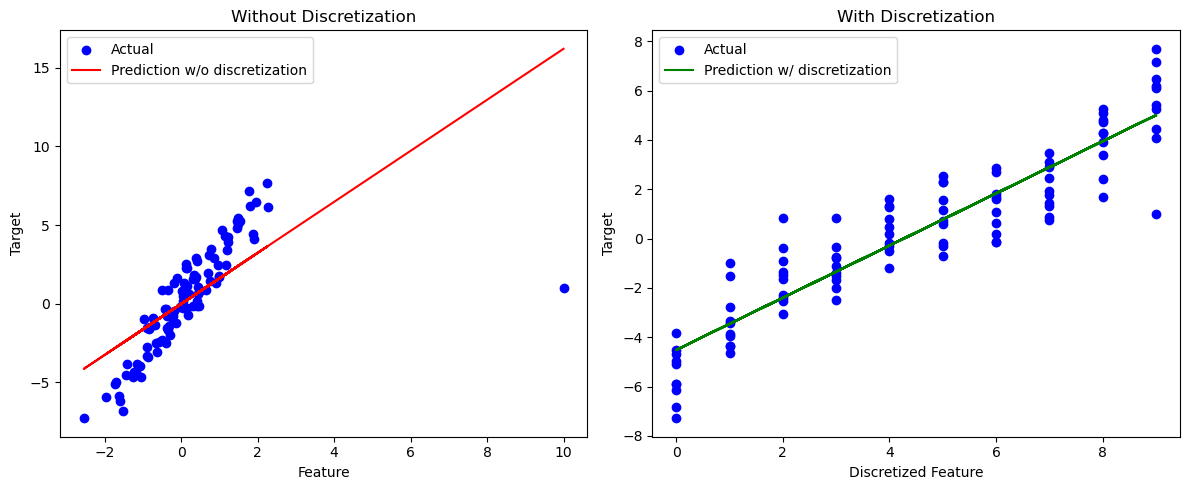

MSE without discretization: 5.63
MSE with discretization: 1.64


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.random.normal(0, 1, size=(100, 1))
y = 3 * X.squeeze() + np.random.normal(0, 1, size=100)

# Introduce an outlier
X[99] = 10
y[99] = 1

# Apply linear regression directly
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Discretize the feature
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_disc = disc.fit_transform(X)

# Apply linear regression on the discretized feature
lin_reg_disc = LinearRegression()
lin_reg_disc.fit(X_disc, y)
y_pred_disc = lin_reg_disc.predict(X_disc)

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Prediction w/o discretization')
plt.title('Without Discretization')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_disc, y, color='blue', label='Actual')
plt.plot(X_disc, y_pred_disc, color='green', label='Prediction w/ discretization')
plt.title('With Discretization')
plt.xlabel('Discretized Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and compare MSE
mse_without_disc = mean_squared_error(y, y_pred)
mse_with_disc = mean_squared_error(y, y_pred_disc)
print(f'MSE without discretization: {mse_without_disc:.2f}')
print(f'MSE with discretization: {mse_with_disc:.2f}')


### 4. Better Interpretability

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
data = data[['Age', 'Survived']].dropna()  # Focus on age and survival, dropping missing values
X = data[['Age']]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression on the original data
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred)
print(f'Accuracy without discretization: {accuracy_orig:.2f}')
print(f'Coefficient for the Age feature: {model.coef_[0][0]:.2f}')

# Discretize the 'age' feature with one-hot encoding
disc = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile')
X_train_disc = disc.fit_transform(X_train)
X_test_disc = disc.transform(X_test)

# Logistic Regression on the discretized data
model_disc = LogisticRegression()
model_disc.fit(X_train_disc, y_train)
y_pred_disc = model_disc.predict(X_test_disc)
accuracy_disc = accuracy_score(y_test, y_pred_disc)
print(f'Accuracy with discretization: {accuracy_disc:.2f}')

# Bin edges for age feature
bin_edges = disc.bin_edges_[0]

# Prepare bin labels with exact ranges
bin_labels = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Display coefficients for the discretized 'age' feature with exact ranges
coefficients = pd.DataFrame(model_disc.coef_.T, columns=['Coefficient'], index=bin_labels)
print(coefficients)


Accuracy without discretization: 0.60
Coefficient for the Age feature: -0.02
Accuracy with discretization: 0.61
               Coefficient
0.42 - 21.00      0.281509
21.00 - 28.50    -0.101095
28.50 - 39.00     0.098512
39.00 - 80.00    -0.272118


### 5. Model Compatibility

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
import time



In [13]:
# Load the Wine Quality dataset
wine_data = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv',delimiter=";")  # Adjust the path as necessary

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Split the data into features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
925,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,7.5,0.58,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8


In [15]:
# Experiment 1: Decision Tree on Continuous Features
start_time = time.time()
dtree_cont = DecisionTreeRegressor(random_state=42)
dtree_cont.fit(X_train, y_train)
training_time_cont = time.time() - start_time

y_pred_cont = dtree_cont.predict(X_test)
mse = mean_squared_error(y_test, y_pred_cont)



# Output the results
print(f"Continuous Features - Training Time: {training_time_cont:.4f} seconds, MSE: {mse:.4f}")

Continuous Features - Training Time: 0.0078 seconds, MSE: 0.6250


In [16]:
# Experiment 2: Discretizing Features
discretizer = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile')
X_train_binned = discretizer.fit_transform(X_train)
X_test_binned = discretizer.transform(X_test)

X_train_binned

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [17]:
start_time = time.time()
dtree_binned = DecisionTreeRegressor(random_state=42)
dtree_binned.fit(X_train_binned, y_train)
training_time_binned = time.time() - start_time

y_pred_binned = dtree_binned.predict(X_test_binned)
mse_binned = mean_squared_error(y_test, y_pred_binned)


print(f"Discretized Features - Training Time: {training_time_binned:.4f} seconds, MSE: {mse_binned:.4f}")

Discretized Features - Training Time: 0.0063 seconds, MSE: 0.7183


### Disadvantages of Discretization

1. __Loss of information__


2. __Model Incompatibility__


3. __Difficulty in choosing bin size__

## Types of Discretization: